<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
df = pd.read_csv("dst-3.0_16_1_hh_database.csv", delimiter=";")

In [3]:
print(df.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
print(df.head())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
print([col for col in df.columns if df[col].count() < df.shape[0]])

['Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность']


5. Выведите основную статистическую информацию о столбцах.


In [7]:
print(df.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
def map_education(text):
    if pd.isna(text):
        return np.nan
    text_lower = "".join(text.lower().split()[:2])
    if 'высшее' in text_lower:
        if 'неоконченное' in text_lower:
            return 'неоконченное высшее'
        return 'высшее'
    elif 'среднее' in text_lower:
        if 'специальное' in text_lower:
            return 'среднее специальное'
        return 'среднее'
    print(f"Faced unkonwn education data: {text_lower=}")

df['Образование'] = df['Образование и ВУЗ'].apply(map_education)
#df = df.drop('Образование и ВУЗ', axis=1)

In [9]:
print((df['Образование'] == 'среднее').sum())

559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
def get_gender(text):
    if pd.isna(text): return np.nan
    return 'М' if 'Мужчина' in text else 'Ж'

def get_age(text):
    if pd.isna(text): return np.nan
    match = re.search(r'(\d+)\s+(?:лет|год)', text)
    return int(match.group(1)) if match else np.nan

df['Пол'] = df['Пол, возраст'].apply(get_gender)
df['Возраст'] = df['Пол, возраст'].apply(get_age)
#df = df.drop('Пол, возраст', axis=1)

In [11]:
print((df['Пол'].value_counts(normalize=True).get('Ж', 0) * 100).round(2))

print(df["Возраст"].mean().round(1))

19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
def experience_to_months(text):
    if pd.isna(text) or text == 'Не указано':
        return np.nan
    
    years = months = 0

    year_pattern = r'(\d+)\s+(?:год[а]?|лет)'
    year_match = re.search(year_pattern, text)
    if year_match:
        years = int(year_match.group(1))

    month_pattern = r'(\d+)\s+месяц(?:а|ев)?'
    month_match = re.search(month_pattern, text)
    if month_match:
        months = int(month_match.group(1))
    
    return years * 12 + months

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(experience_to_months)
#df = df.drop('Опыт работы', axis=1)

In [13]:
print(df['Опыт работы (месяц)'].median())

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [14]:
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
phrases_positive = ['готов', 'готова', 'хочу']
phrases_negative = ['не готов', 'не готова', 'не хочу']

def get_city(text):
    if pd.isna(text):
        return 'другие'
    city = text.split(',')[0].strip()
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    return 'другие'

def get_relocation(text):
    if pd.isna(text):
        return False
    parts = [part.strip() for part in text.split(',')]
    relocation_part = ''
    if len(parts) >= 3 and '(' in parts[1]:
        relocation_part = parts[2].lower()
    elif len(parts) >= 2:
        relocation_part = parts[1].lower()

    if any(phrase in relocation_part for phrase in phrases_negative):
        return False
    if any(phrase in relocation_part for phrase in phrases_positive):
        return True
    return False

def get_business_trip(text):
    if pd.isna(text):
        return False
    parts = [part.strip() for part in text.split(',')]
    business_trip_part = parts[-1].lower() if parts else ''

    if '(' in business_trip_part:
        return False
    if any(phrase in business_trip_part for phrase in phrases_negative):
        return False
    elif any(phrase in business_trip_part for phrase in phrases_positive):
        return True
    return False


df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_relocation)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_business_trip)
#df = df.drop('Город, переезд, командировки', axis=1)

In [15]:
print(round((df['Город'] == 'Санкт-Петербург').mean() * 100))
print(round(((df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)).mean() * 100))

11
17


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [16]:
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for category in employment_categories:
    df[category] = df['Занятость'].apply(lambda x: category in x.lower() if pd.notna(x) else False)

schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for category in schedule_categories:
    df[category] = df['График'].apply(lambda x: category in x.lower() if pd.notna(x) else False)

#df = df.drop(['Занятость', 'График'], axis=1)

In [17]:
print(len(df[(df['проектная работа'] == True) & (df['волонтерство'] == True)]))
print(len(df[(df['вахтовый метод'] == True) & (df['гибкий график'] == True)]))

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [18]:
currency_df = pd.read_csv('ExchangeRates.csv')
currency_df['date'] = pd.to_datetime(currency_df['date'], format='%d/%m/%y').dt.date

df['date'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date

def extract_salary(salary_str):
    if pd.isna(salary_str): 
        return np.nan, np.nan
    parts = salary_str.split()
    if len(parts) < 2:
        return np.nan, np.nan
    amount_str = parts[0].replace(' ', '')
    try:
        amount = int(amount_str)
    except:
        return np.nan, np.nan
    currency = parts[-1].lower().replace('.', '')
    
    return amount, currency

df[['salary_amount', 'salary_currency']] = df['ЗП'].apply(lambda x: pd.Series(extract_salary(x)))

currency_map = {
    'руб': 'RUB', 'грн': 'UAH', 'usd': 'USD', 'eur': 'EUR',
    'белруб': 'BYN', 'kgs': 'KGS', 'сум': 'UZS', 'azn': 'AZN', 'kzt': 'KZT'
}

df['salary_currency_iso'] = df['salary_currency'].map(currency_map)

df = df.merge(currency_df, left_on=['date', 'salary_currency_iso'], right_on=['date', 'currency'], how='left')

df.loc[df['salary_currency_iso'] == 'RUB', 'close'] = 1.0
df.loc[df['salary_currency_iso'] == 'RUB', 'proportion'] = 1.0

df['ЗП (руб)'] = df['salary_amount'] * df['close'] / df['proportion']
print(df['salary_currency'].value_counts())
df = df.drop(['salary_amount', 'salary_currency', 'salary_currency_iso', 'date', 'currency', 'proportion', 'close'], axis=1)

#df = df.drop(['ЗП', 'salary_amount', 'salary_currency', 'salary_currency_iso', 'date', 'currency', 'proportion', 'close'], axis=1)

salary_currency
руб       42471
kzt        1108
usd         628
белруб      329
eur         106
грн          73
сум          20
kgs           6
azn           3
Name: count, dtype: int64


In [19]:
print((df['ЗП (руб)'].median()))

59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

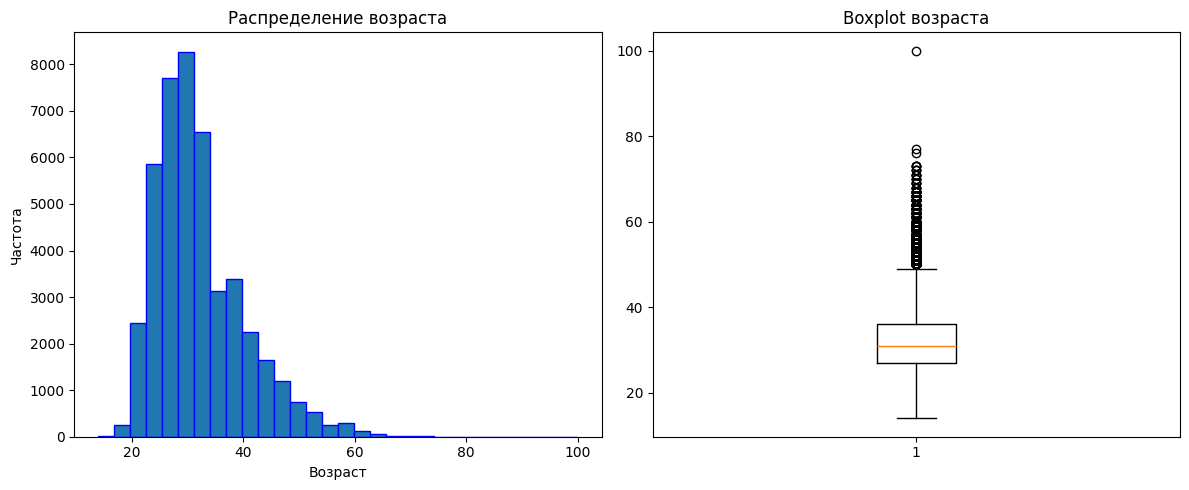

Мода возраста: 30


In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['Возраст'].dropna(), bins=30, edgecolor='blue')
ax1.set_title('Распределение возраста')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Частота')

ax2.boxplot(df['Возраст'].dropna())
ax2.set_title('Boxplot возраста')

plt.tight_layout()
plt.show()

print(f"Мода возраста: {df['Возраст'].mode()[0]}")

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

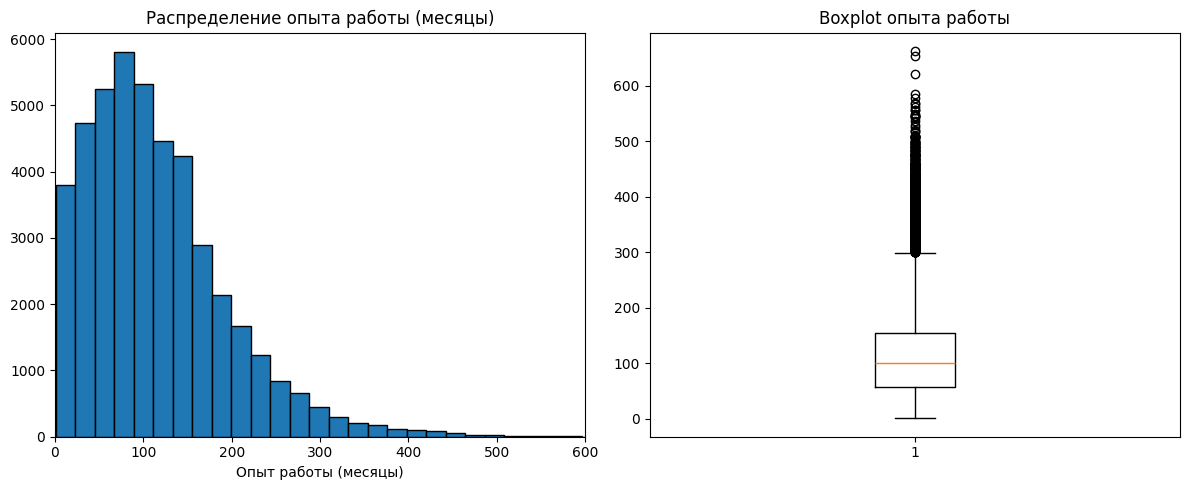

Максимальный опыт работы: 663.0


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df_clean = df[df['Опыт работы (месяц)'] <= 1000]

ax1.hist(df_clean['Опыт работы (месяц)'].dropna(), bins=30, edgecolor='black')
ax1.set_title('Распределение опыта работы (месяцы)')
ax1.set_xlabel('Опыт работы (месяцы)')
ax1.set_xlim(0, 600)

ax2.boxplot(df_clean['Опыт работы (месяц)'].dropna())
ax2.set_title('Boxplot опыта работы')

plt.tight_layout()
plt.show()

print(f"Максимальный опыт работы: {df_clean['Опыт работы (месяц)'].max()}")

- Мода распределения опыта работы составляет 100 месяцев
- Большинство соискателей имеют опыт работы от 0 до 300 месяцев (0-25 лет)
- Присутствуют явные аномалии - значения выше 1000 месяцев (83 года), что превышает нормальную продолжительность трудовой деятельности
- Максимальное значение составляет 24230 месяцев - это явный выброс

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Количество соискателей с ЗП выше 1 млн: 5
Количество соискателей с ЗП выше 500 тысяч: 32


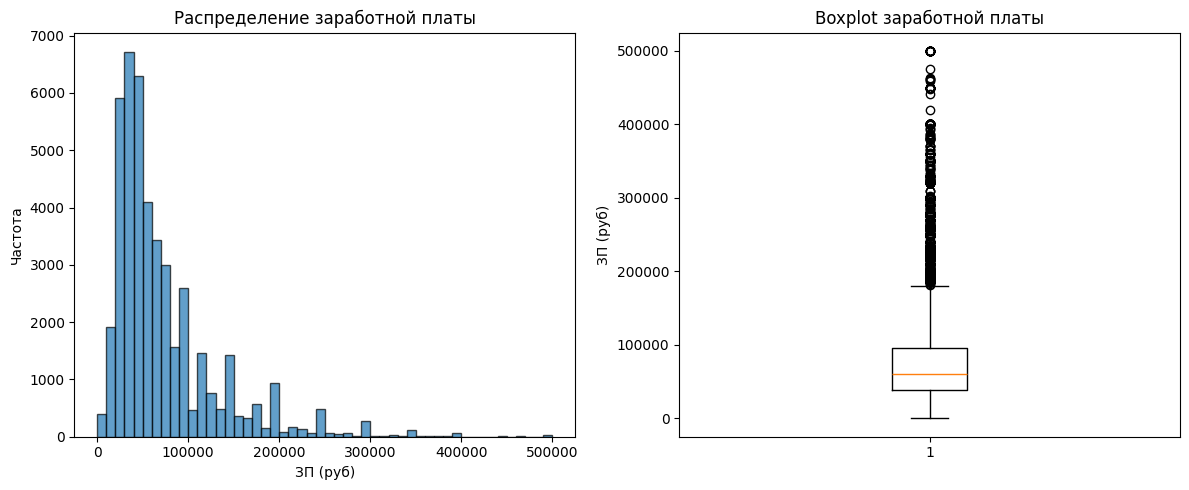

0    50000.0
Name: ЗП (руб), dtype: float64


In [22]:
print(f"Количество соискателей с ЗП выше 1 млн: {len(df[df['ЗП (руб)'] > 1000000])}")
print(f"Количество соискателей с ЗП выше 500 тысяч: {len(df[df['ЗП (руб)'] > 500000])}")

df_clean = df_clean[df_clean['ЗП (руб)'] <= 500000]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df_clean['ЗП (руб)'].dropna(), bins=50, edgecolor='black', alpha=0.7)
ax1.set_title('Распределение заработной платы')
ax1.set_xlabel('ЗП (руб)')
ax1.set_ylabel('Частота')

ax2.boxplot(df_clean['ЗП (руб)'].dropna())
ax2.set_title('Boxplot заработной платы')
ax2.set_ylabel('ЗП (руб)')

plt.tight_layout()
plt.show()

print(df_clean['ЗП (руб)'].mode())

- Мода распределения 50000 рублей
- Большинство соискателей ожидают зарплату до 200 тысяч рублей
- Присутсвуют экстремальные выбросы: значений выше 1 миллиона -- 5, выше 500к - 32

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

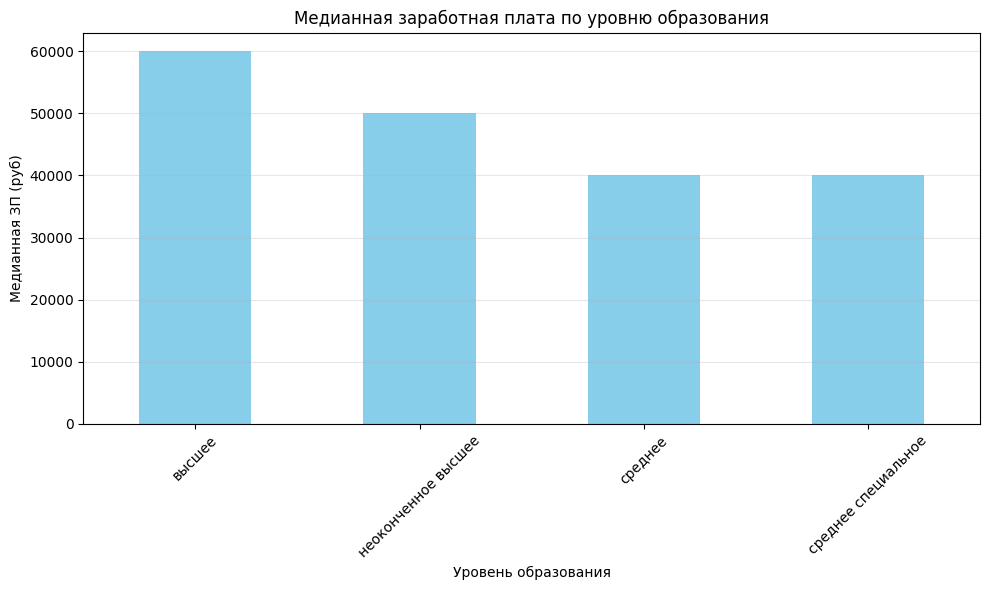

Медианные ЗП по образованию:
Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


In [23]:
df_filtered = df[df['ЗП (руб)'] <= 1000000]

plt.figure(figsize=(10, 6))
education_salary = df_filtered.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)
education_salary.plot(kind='bar', color='skyblue')
plt.title('Медианная заработная плата по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Медианные ЗП по образованию:")
print(education_salary)

- Наибольшая медианная ЗП наблюдается у соискателей с высшим образованием
- Неоконченное высшее занимает второе место
- Среднее и среднее специальное показывают одинаковую моду
- Признак уровня образования явно важен для прогнозирования ЗП

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

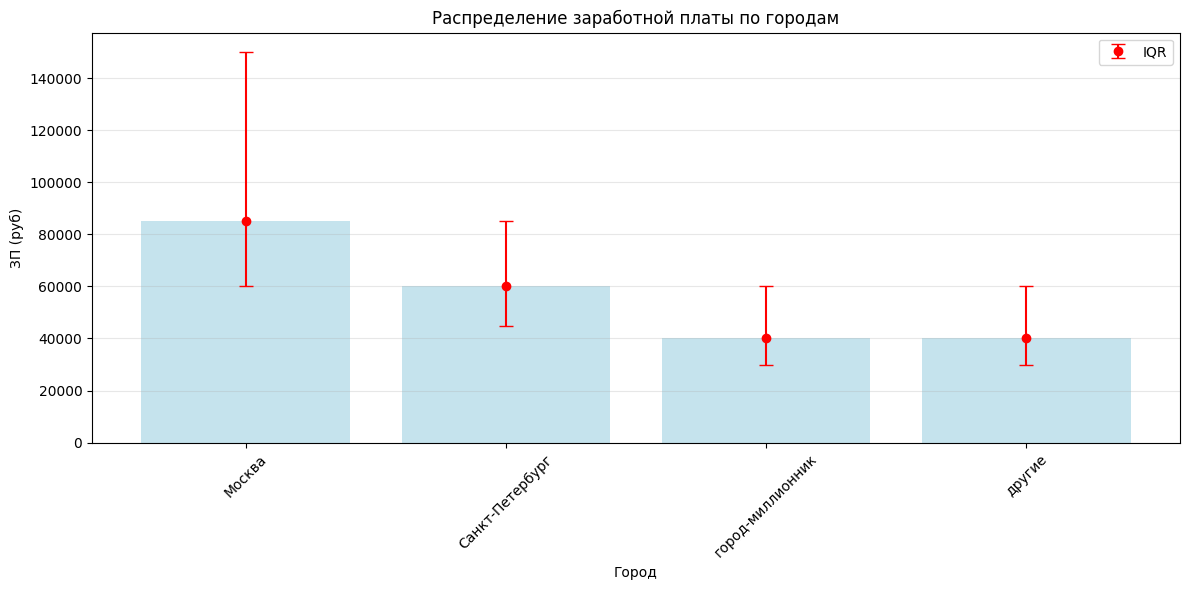

Медианные ЗП по городам:
Город
Москва              85000.0
Санкт-Петербург     60000.0
город-миллионник    40000.0
другие              40000.0
Name: 50%, dtype: float64


In [24]:
plt.figure(figsize=(12, 6))
df_city_salary = df_filtered.groupby('Город')['ЗП (руб)'].describe()[['50%', '75%', '25%']]
df_city_salary = df_city_salary.sort_values('50%', ascending=False)

cities = df_city_salary.index
medians = df_city_salary['50%']
q25 = df_city_salary['25%']
q75 = df_city_salary['75%']

plt.bar(cities, medians, color='lightblue', alpha=0.7)
plt.errorbar(cities, medians, yerr=[medians - q25, q75 - medians], fmt='o', color='red', capsize=5, label='IQR')
plt.title('Распределение заработной платы по городам')
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Медианные ЗП по городам:")
print(df_city_salary['50%'])

- Наибольшая медианная заработная плата в Москве
- Санкт-Петербург показывает второй результат
- Города-миллионники имеют схожие уровни оплаты с небольшими вариациями
- Разброс заработных плат (IQR) наибольший в Москве, что указывает на большую вариативность доходов
- Признак города является важным фактором при прогнозировании заработной платы

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

<Figure size 1200x800 with 0 Axes>

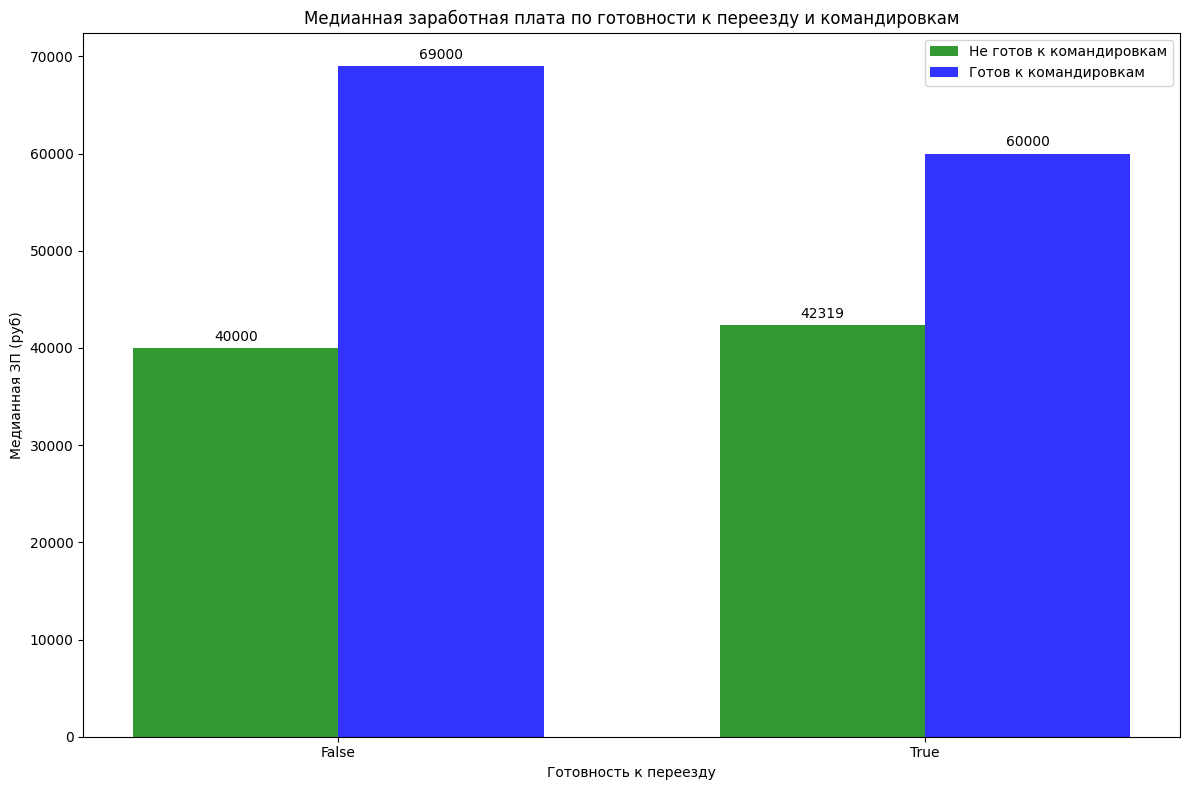

Медианные ЗП по комбинациям:
Готовность к командировкам      False    True 
Готовность к переезду                         
False                       40000.000  69000.0
True                        42318.875  60000.0

Медианная ЗП для готовых к переезду и командировкам: 60000 руб.


In [25]:
pivot_data = df_filtered.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

plt.figure(figsize=(12, 8))
x = np.arange(len(pivot_data.index))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, pivot_data[False], width, label='Не готов к командировкам', 
                color='green', alpha=0.8)

rects2 = ax.bar(x + width/2, pivot_data[True], width, label='Готов к командировкам', 
                color='blue', alpha=0.8)

ax.set_xlabel('Готовность к переезду')
ax.set_ylabel('Медианная ЗП (руб)')
ax.set_title('Медианная заработная плата по готовности к переезду и командировкам')
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=10)
autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

print("Медианные ЗП по комбинациям:")
print(pivot_data)
print(f"\nМедианная ЗП для готовых к переезду и командировкам: {int(pivot_data.loc[True, True])} руб.")

In [26]:
# ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

/tmp/ipykernel_671336/352245456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Возрастная группа'] = pd.cut(df_filtered['Возраст'], bins=age_bins, labels=age_labels)
/tmp/ipykernel_671336/352245456.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_salary = df_filtered.pivot_table(


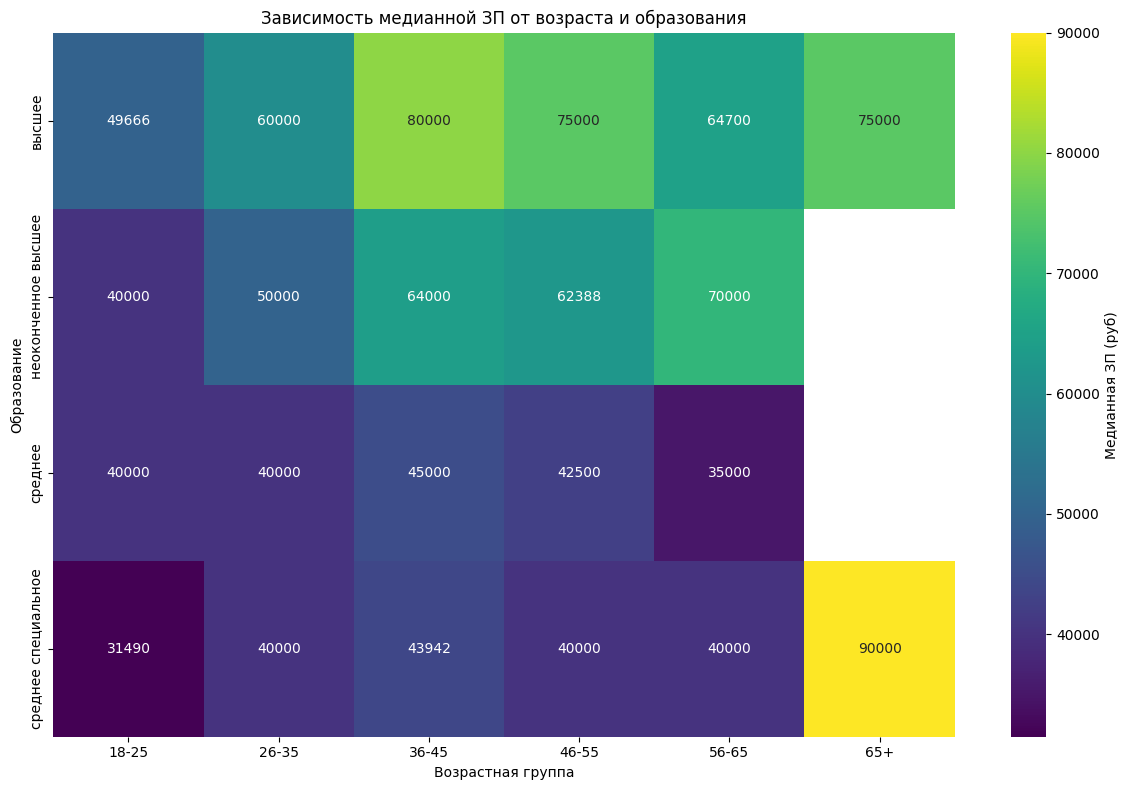

In [27]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_filtered['Возрастная группа'] = pd.cut(df_filtered['Возраст'], bins=age_bins, labels=age_labels)

pivot_salary = df_filtered.pivot_table(
    values='ЗП (руб)', 
    index='Образование', 
    columns='Возрастная группа', 
    aggfunc='median'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_salary, annot=True, fmt='.0f', cmap='viridis', 
            cbar_kws={'label': 'Медианная ЗП (руб)'})
plt.title('Зависимость медианной ЗП от возраста и образования')
plt.tight_layout()
plt.show()

- Наиболее интенсивный карьерный рост наблюдается у соискателей с высшим образованием
- Пик заработной платы для большинства категорий образования приходится на возраст 36-45 лет
- После 45-55 лет наблюдается стабилизация или небольшое снижение медианной ЗП
- Среднее специальное образование показывает стабильный рост до 45 лет (значение в 90к для 65+ выглядит как выброс (очень мало таких точек, медиана ведёт себя странно), тем более, что для соседних групп таких уже нет)

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

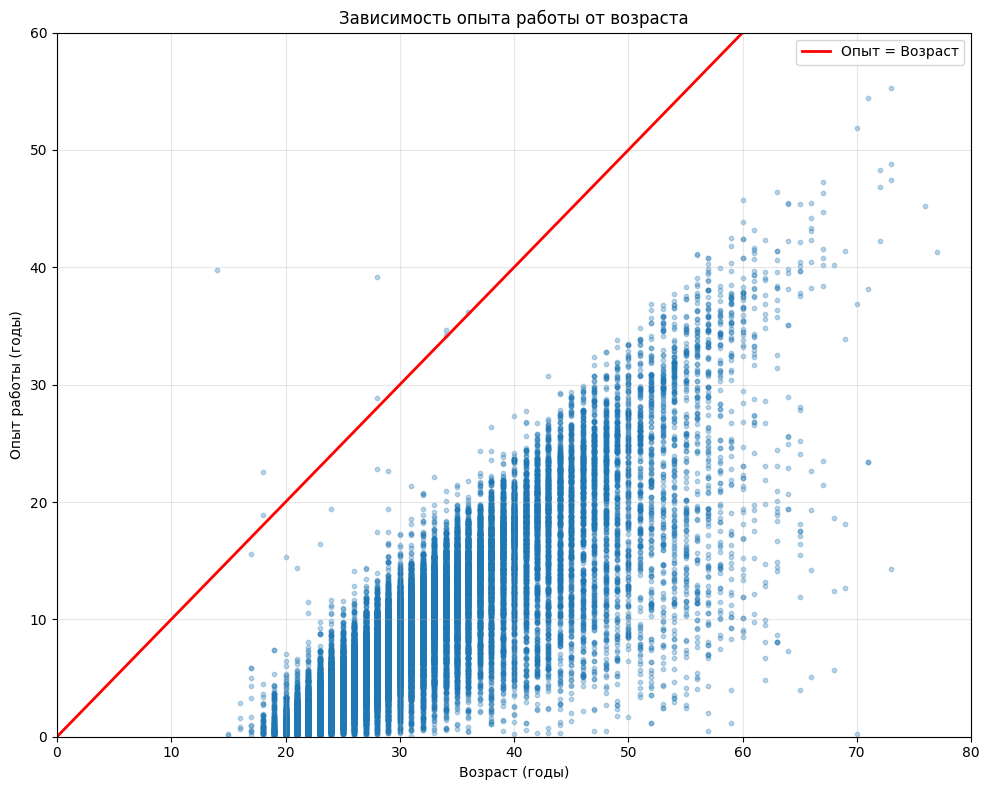

Количество аномалий : 32


In [28]:
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

plt.figure(figsize=(10, 8))
plt.scatter(df['Возраст'], df['Опыт работы (годы)'], 
           alpha=0.3, s=10)
plt.plot([0, 100], [0, 100], 'r-', linewidth=2, label='Опыт = Возраст')
plt.xlabel('Возраст (годы)')
plt.ylabel('Опыт работы (годы)')
plt.title('Зависимость опыта работы от возраста')
plt.xlim(0, 80)
plt.ylim(0, 60)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Количество аномалий : {len(df[df['Опыт работы (годы)'] > df['Возраст']])}")

- Основная масса данных лежит ниже линии "опыт = возраст", что соответствует логике
- Явно прослеживается услонвая граница начала работы в ~15-18 лет
- Наблюдается четкая положительная корреляция между возрастом и опытом работы
- Аномальные точки (опыт работы превышает возраст) требуют дополнительной проверки

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


<Figure size 1000x600 with 0 Axes>

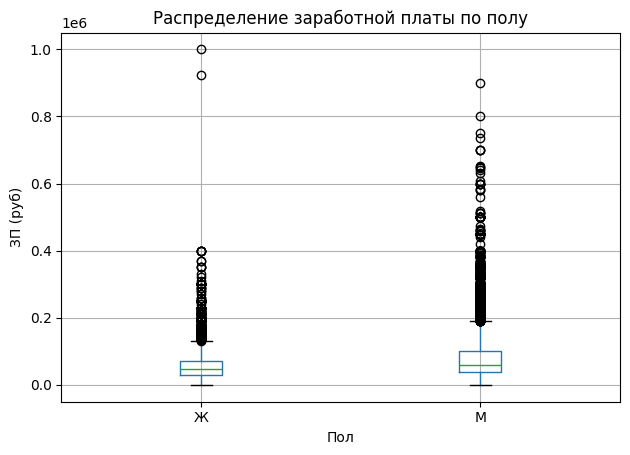

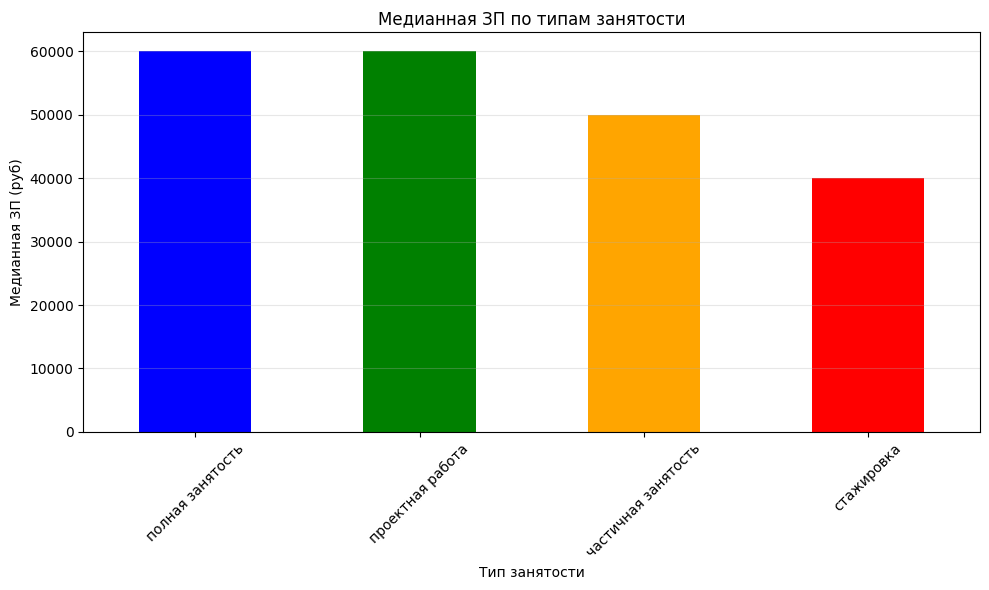

In [29]:
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='ЗП (руб)', by='Пол')
plt.title('Распределение заработной платы по полу')
plt.suptitle('')
plt.xlabel('Пол')
plt.ylabel('ЗП (руб)')
plt.tight_layout()
plt.show()

employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка']
employment_salary = df_filtered[employment_types].apply(
    lambda x: df_filtered.loc[x, 'ЗП (руб)'].median()
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
employment_salary.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Медианная ЗП по типам занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- По полу: наблюдается заметное различие в распределении заработных плат между мужчинами и женщинами, особенно в максимуме ЗП для большинства
- По типам занятости: проектная работа и полная занятость имеют наибольшую медианную ЗП, стажировка - наименьшую

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [30]:
print(f"Размер датасета до удаления: {df.shape}")
duplicates_count = df.duplicated().sum()
print(f"Найдено дубликатов: {duplicates_count}")

df_clean = df.drop_duplicates()
print(f"Размер датасета после удаления: {df_clean.shape}")

Размер датасета до удаления: (44744, 34)
Найдено дубликатов: 153
Размер датасета после удаления: (44591, 34)


Я не понимаю что у меня к этому моменту неправильно, но ответы с системой отказываются совпадать :(

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [36]:
print("Информация о пропусках:")
missing_info = df_clean.isnull().sum()
print(missing_info[missing_info > 0])

print(f"\nПропусков в столбце 'Опыт работы (месяц)': {df_clean['Опыт работы (месяц)'].isnull().sum()}")

Информация о пропусках:
Опыт работы                          166
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Опыт работы (месяц)                  168
per                                42320
time                               42320
vol                                42320
Опыт работы (годы)                   168
dtype: int64

Пропусков в столбце 'Опыт работы (месяц)': 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [37]:
df_clean = df_clean.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

experience_median = df_clean['Опыт работы (месяц)'].median()
print(f"Медианное значение опыта работы: {experience_median}")
df_clean['Опыт работы (месяц)'] = df_clean['Опыт работы (месяц)'].fillna(experience_median)

experience_mean_after = df_clean['Опыт работы (месяц)'].mean()
print(f"Среднее значение опыта работы после заполнения: {round(experience_mean_after)}")

Медианное значение опыта работы: 100.0
Среднее значение опыта работы после заполнения: 127


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [33]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [34]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [35]:
# ваш код здесь

ваш коммментарий здесь